# The following dataset deals with rainfall in Australia. The Kaggle challenge was to predict if there was going to be rain the next day.

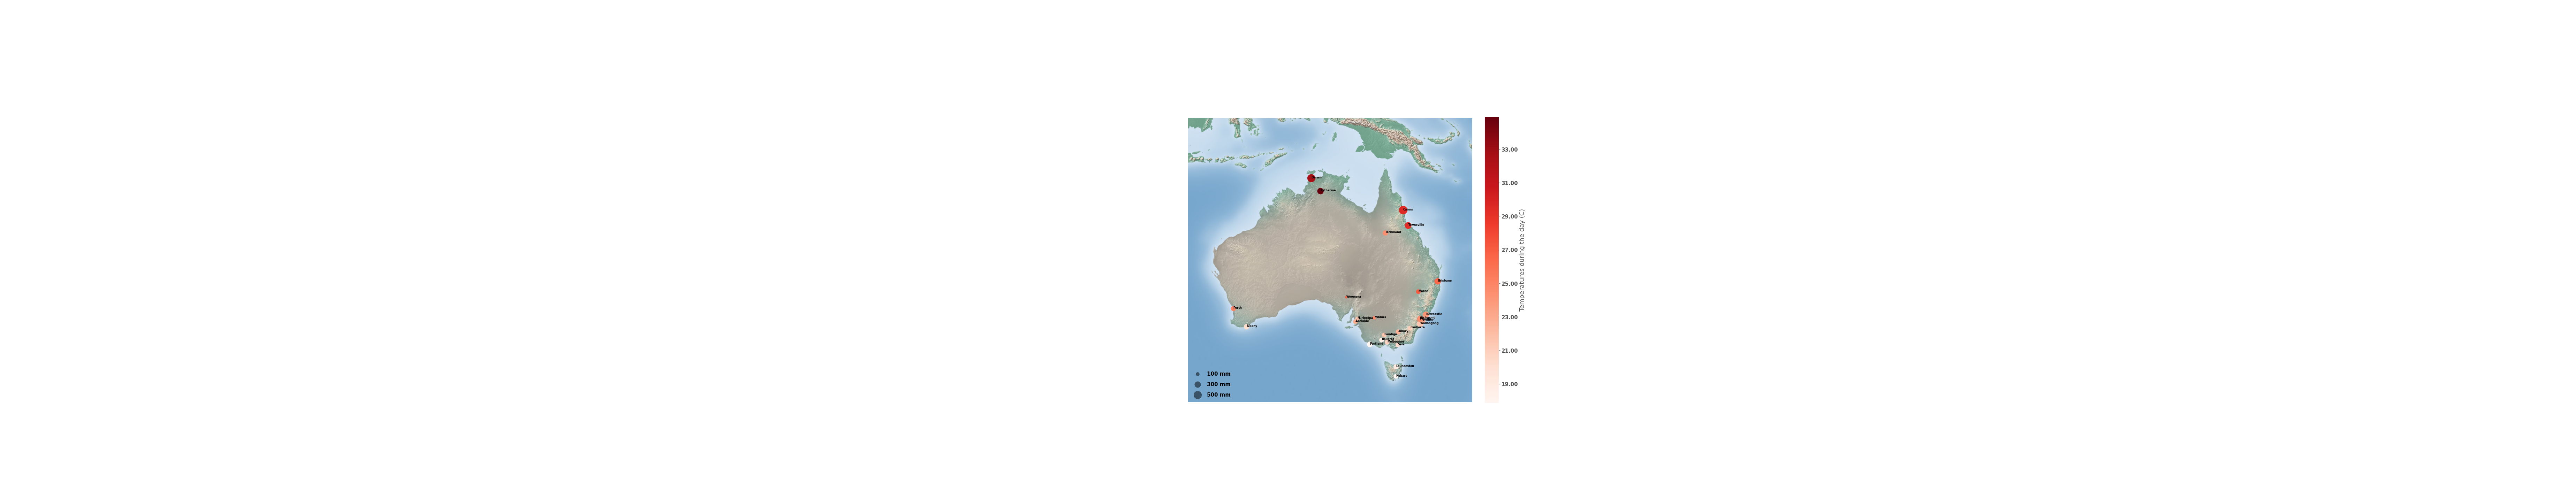

In [59]:
# 1. Draw the map background
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(16, 16))

m = Basemap(projection='lcc', resolution='l', 
            lat_0=-25.2744, lon_0=133.7751,
            width=5E6, height=5E6)

x,y = m(lon, lat)
[plt.annotate(text=nme,xy=(xp + 0.5,yp - 1),color="black",fontsize=8) for nme,xp,yp in zip(city.values,x,y)]
m.shadedrelief()

m.scatter(lon, lat, latlon=True, s=rainfall * 100,
          c = temperature,
          cmap='Reds')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)
cbar = plt.colorbar(ticks=np.arange(15, 35, step = 2), format='%0.2f',label = "Temperatures during the day (C)", 
                    fraction=0.046, pad=0.04)
cbar.solids.set_edgecolor("face")

for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' mm')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [ ]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [2]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
df = pd.read_csv("weatherAUS.csv")

The features are given below:

In [5]:
list(df)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

The following line shows that the dataset was un-balanced.

In [6]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0, 0.5, 'Minimum temperature')

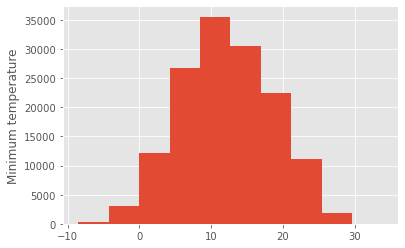

In [6]:
plt.hist(df["MinTemp"]);
plt.ylabel("Minimum temperature")

Text(0, 0.5, 'Maximum temperature')

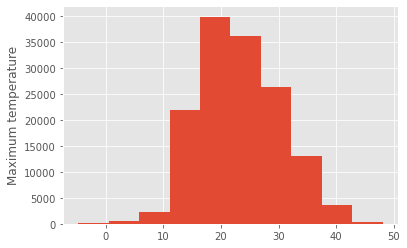

In [6]:
plt.hist(df["MaxTemp"]);
plt.ylabel("Maximum temperature")

(0.0, 20.0)

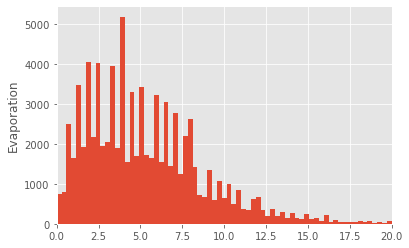

In [7]:
plt.hist(df["Evaporation"], bins = 500);
plt.ylabel("Evaporation")
plt.xlim(0,20)

This gives a good understanding of the values present in the feature space, and also helps understnad if there are any missing values.

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df1 = df.copy(deep= True)
# removing all entries with no values in rain tomorrow
df1 = df1[~df1["RainTomorrow"].isna()]

In [9]:
print(df.shape)
print(df1.shape)

(145460, 23)
(142193, 23)


In [11]:
# Replacing Nans with mode values and medians in case of integers.
for i in list(df1):
    if i != "Date":
        if df1[df1[i].isna()].shape[0] !=0:
            if df1[i].dtype == 'O':
                df1[i] = df1[i].replace(np.NaN, df1[i].mode()[0])
            else:
                df1[i] = df1[i].replace(np.NaN, df1[i].mean())

In [12]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


Converting the 'date' to a more meaningful number

In [14]:
df1["Month"] = pd.to_numeric(df1["Date"].str.split("-", expand = True)[1])

Text(0.5, 0, 'Month')

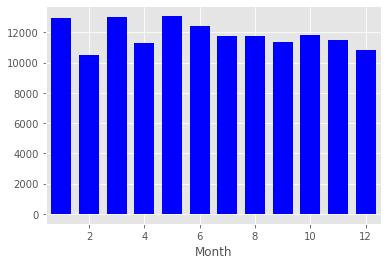

In [15]:
v, c = np.unique(df1["Month"], return_counts =True)
plt.vlines(v, 0, c, color = 'blue', lw = 20)
plt.xlabel("Month")

In [16]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for i in list(df):
    if df[i].dtype == 'O':
        le.fit(df1[i]) 
        df1[i]=le.transform(df1[i]) 

In [17]:
df1.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,1924.782908,23.740655,12.186400,23.226784,2.349974,5.469824,7.624853,8.059039,39.984292,7.000316,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.221213,0.224181,6.402544
std,886.165810,14.237503,6.388924,7.109554,8.423217,3.168114,2.734927,4.694267,13.138385,4.514678,...,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,0.415065,0.417043,3.426506
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000
25%,1162.000000,11.000000,7.600000,17.900000,0.000000,4.000000,7.624853,4.000000,31.000000,3.000000,...,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,3.000000
50%,1945.000000,24.000000,12.000000,22.700000,0.000000,5.469824,7.624853,9.000000,39.000000,7.000000,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,0.000000,0.000000,6.000000
75%,2691.000000,36.000000,16.800000,28.200000,0.800000,5.469824,8.700000,13.000000,46.000000,11.000000,...,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.000000,9.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,12.000000


In [19]:
df1.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,1924.782908,23.740655,12.186400,23.226784,2.349974,5.469824,7.624853,8.059039,39.984292,7.000316,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.221213,0.224181,6.402544
std,886.165810,14.237503,6.388924,7.109554,8.423217,3.168114,2.734927,4.694267,13.138385,4.514678,...,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,0.415065,0.417043,3.426506
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000
25%,1162.000000,11.000000,7.600000,17.900000,0.000000,4.000000,7.624853,4.000000,31.000000,3.000000,...,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,3.000000
50%,1945.000000,24.000000,12.000000,22.700000,0.000000,5.469824,7.624853,9.000000,39.000000,7.000000,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,0.000000,0.000000,6.000000
75%,2691.000000,36.000000,16.800000,28.200000,0.800000,5.469824,8.700000,13.000000,46.000000,11.000000,...,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.000000,9.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,12.000000


In [20]:
X = df1.drop('RainTomorrow', axis = 1)
y = df1['RainTomorrow']

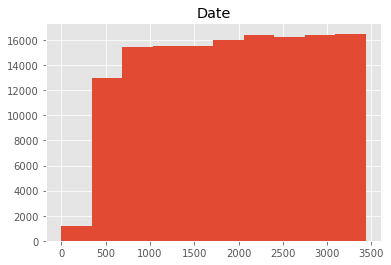

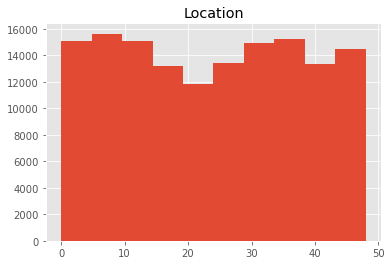

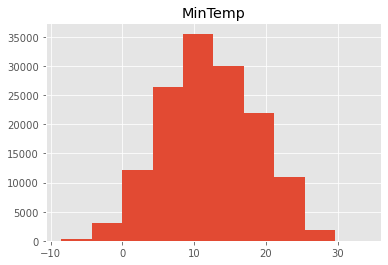

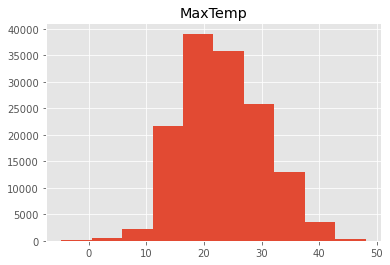

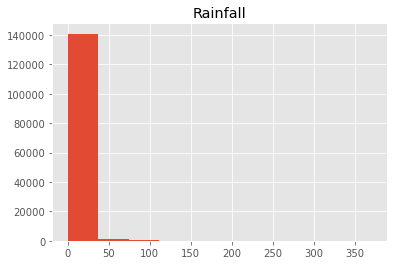

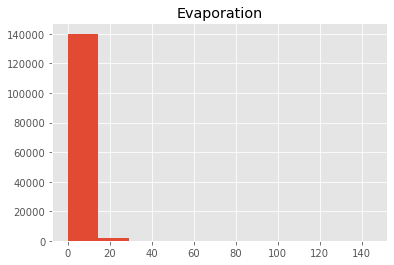

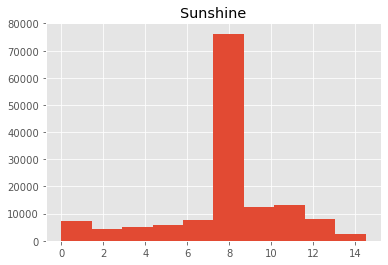

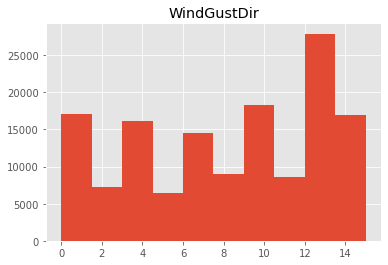

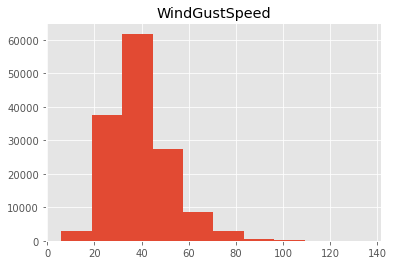

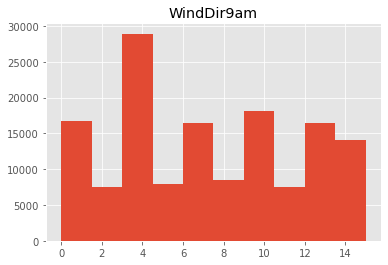

In [23]:
for i in list(df1)[:10]:
    plt.figure()
    plt.title(i)
    plt.hist(df1[i]);

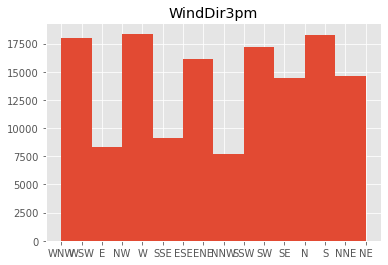

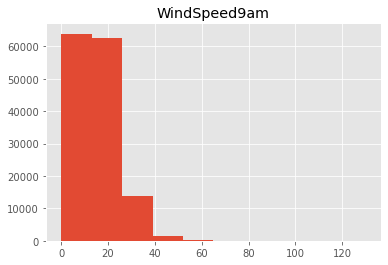

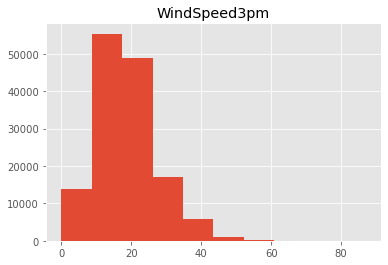

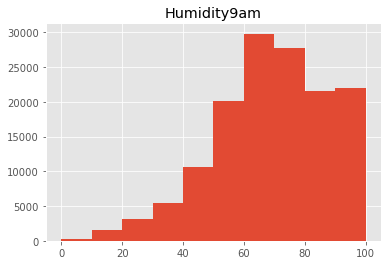

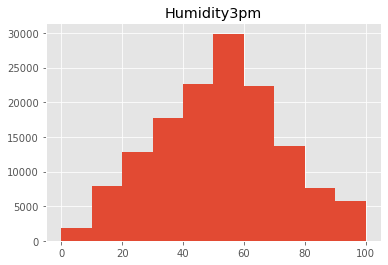

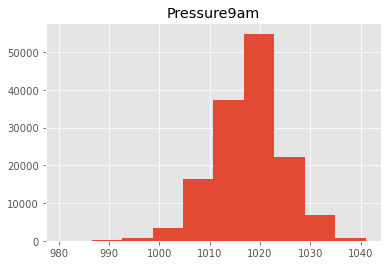

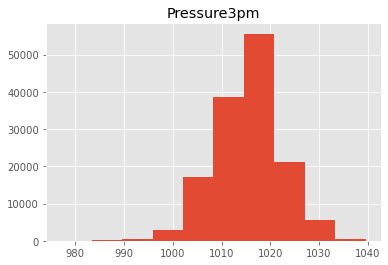

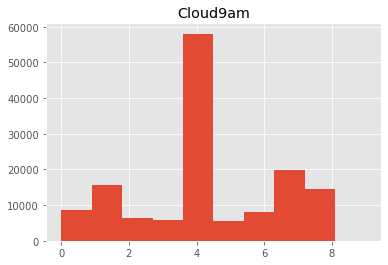

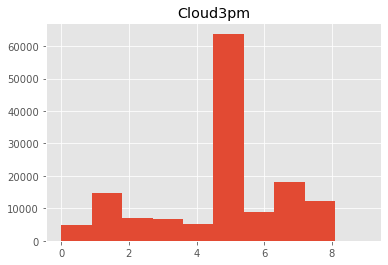

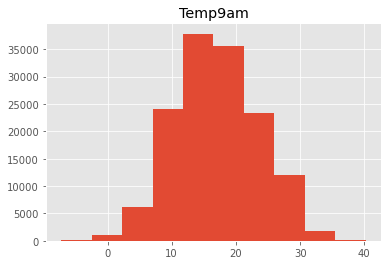

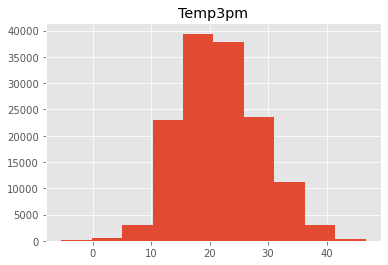

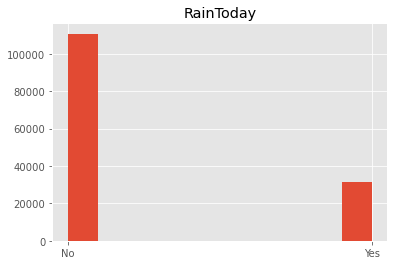

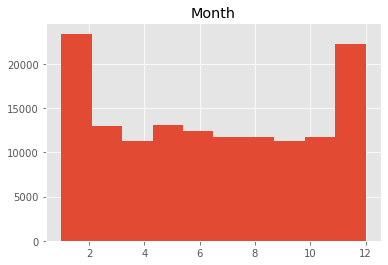

In [24]:
for i in list(X)[10:]:
    plt.figure()
    plt.title(i)
    plt.hist(X[i]);

# Before any scaling.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

0.8415907732339393
0.8244664017722142
0.8024192130524983
0.7886704877105384
0.8268926474207954
0.8176096205914414
0.3359119518970428


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model,Score
3,Logistic Regression,0.841591
5,Stochastic Gradient Decent,0.826893
0,KNN,0.824466
2,Random Forest Classifier,0.817610
4,Naive Bayes,0.802419
6,Decision Tree,0.788670
1,Linear SVC,0.335912


# After scaling- minmax scaler

In [25]:
scaler = MinMaxScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

0.8438763669608637
0.8193677696121523
0.802524701993741
0.7897605401033791
0.841696262175182
0.8172579907872991
0.8422940328422237


,Model,Score
3,Logistic Regression,0.843876
1,Linear SVC,0.842294
5,Stochastic Gradient Decent,0.841696
0,KNN,0.819368
2,Random Forest Classifier,0.817258
4,Naive Bayes,0.802525
6,Decision Tree,0.789761


# Standard scalar

In [22]:
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

0.8435950631175498
0.822673089771089
0.802524701993741
0.7901473328879356
0.840254579978199
0.8201061922008509
0.8427511515876086


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Logistic Regression,0.843595
1,Linear SVC,0.842751
5,Stochastic Gradient Decent,0.839235
0,KNN,0.822673
2,Random Forest Classifier,0.817117
4,Naive Bayes,0.802525
6,Decision Tree,0.788073


In [ ]:
# Trying the oversampling method:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)


In [29]:
models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.882566
6,Decision Tree,0.839962
2,Random Forest Classifier,0.805403
3,Logistic Regression,0.783239
5,Stochastic Gradient Decent,0.782673
1,Linear SVC,0.782423
4,Naive Bayes,0.749768


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


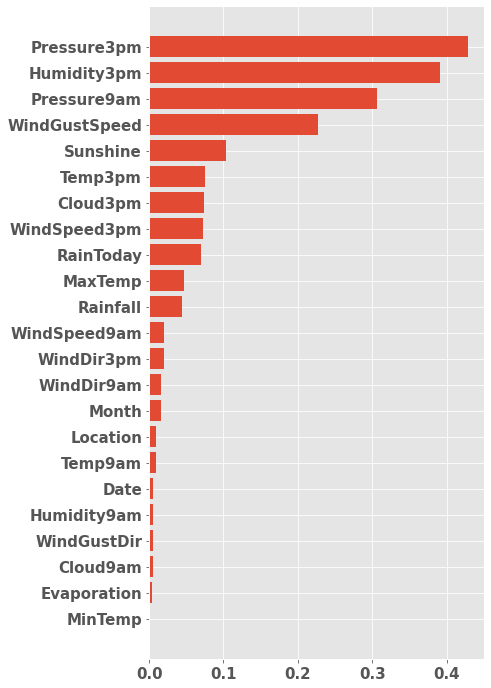

<Figure size 432x288 with 0 Axes>

In [238]:
def correlation(coef, feature):
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

    plt.rc('font', **font)
    cor = abs(coef[0])
    cor, feature = zip(*sorted(zip(cor, feature)))
    plt.figure(figsize = (6,12))
    plt.barh(range(len(feature)), cor)
    plt.yticks(range(len(feature)), feature)
    plt.show()

    
X = df1.drop(columns = ['RainTomorrow'])
y = df1["RainTomorrow"]

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
features_names = list(X)
svm = LinearSVC()
svm.fit(X_test,y_test)
correlation(svm.coef_, features_names)
y_pred=svm.predict(X_test)


plt.savefig("correlation.png")

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


Accuracy Score : 0.8825662292927233
Precision Score : 0.8765760966080625
Recall Score : 0.8915379752551251
F1 Score : 0.8839937318110589


In [40]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8404604890429895
Precision Score : 0.8340261807889616
Recall Score : 0.8515759053553689
F1 Score : 0.8427096831851288


In [46]:
int(X_train.shape[0]*0.8)

141204

# Trying neural networks

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Model, Sequential

In [51]:
model = Sequential()
model.add(Dense(12, input_dim=23, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(X_train[:int(X_train.shape[0]*0.8)], 
          keras.utils.to_categorical(y_train[:int(X_train.shape[0]*0.8)], num_classes=2), 
          epochs=150, batch_size=1000, 
          validation_data= (X_train[int(X_train.shape[0]*0.8):], 
                            keras.utils.to_categorical(y_train[int(X_train.shape[0]*0.8):],num_classes=2)))

Epoch 1/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8246 - mse: 0.1226 - val_loss: 0.3873 - val_accuracy: 0.8232 - val_mse: 0.1236
Epoch 2/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8249 - mse: 0.1225 - val_loss: 0.3874 - val_accuracy: 0.8239 - val_mse: 0.1237
Epoch 3/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8249 - mse: 0.1225 - val_loss: 0.3875 - val_accuracy: 0.8226 - val_mse: 0.1237
Epoch 4/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8251 - mse: 0.1224 - val_loss: 0.3871 - val_accuracy: 0.8235 - val_mse: 0.1235
Epoch 5/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8252 - mse: 0.1224 - val_loss: 0.3866 - val_accuracy: 0.8233 - val_mse: 0.1234
Epoch 6/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8252 - mse: 0.1224 - val_loss

142/142 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8290 - mse: 0.1199 - val_loss: 0.3812 - val_accuracy: 0.8275 - val_mse: 0.1214
Epoch 94/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8284 - mse: 0.1198 - val_loss: 0.3804 - val_accuracy: 0.8278 - val_mse: 0.1210
Epoch 95/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8286 - mse: 0.1198 - val_loss: 0.3808 - val_accuracy: 0.8271 - val_mse: 0.1212
Epoch 96/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8288 - mse: 0.1198 - val_loss: 0.3804 - val_accuracy: 0.8269 - val_mse: 0.1211
Epoch 97/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8287 - mse: 0.1198 - val_loss: 0.3813 - val_accuracy: 0.8271 - val_mse: 0.1214
Epoch 98/150
142/142 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8291 - mse: 0.1197 - val_loss: 0.380

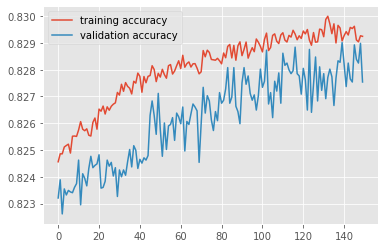

In [63]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 1024)              24576     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_81 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 66        
Total params: 295,266
Trainable params: 295,266
Non-trainable params: 0
_______________________________________________

Epoch 42/150
4/4 [==============================] - 0s 30ms/step - loss: 0.3562 - accuracy: 0.8397 - mse: 0.1129 - val_loss: 0.3567 - val_accuracy: 0.8374 - val_mse: 0.1132
Epoch 43/150
4/4 [==============================] - 0s 31ms/step - loss: 0.3551 - accuracy: 0.8400 - mse: 0.1126 - val_loss: 0.3575 - val_accuracy: 0.8375 - val_mse: 0.1135
Epoch 44/150
4/4 [==============================] - 0s 30ms/step - loss: 0.3551 - accuracy: 0.8397 - mse: 0.1125 - val_loss: 0.3553 - val_accuracy: 0.8389 - val_mse: 0.1127
Epoch 45/150
4/4 [==============================] - 0s 30ms/step - loss: 0.3531 - accuracy: 0.8412 - mse: 0.1119 - val_loss: 0.3563 - val_accuracy: 0.8374 - val_mse: 0.1131
Epoch 46/150
4/4 [==============================] - 0s 30ms/step - loss: 0.3528 - accuracy: 0.8418 - mse: 0.1117 - val_loss: 0.3535 - val_accuracy: 0.8389 - val_mse: 0.1121
Epoch 47/150
4/4 [==============================] - 0s 30ms/step - loss: 0.3510 - accuracy: 0.8418 - mse: 0.1113 - val_loss: 0.3519 - v

4/4 [==============================] - 0s 30ms/step - loss: 0.2824 - accuracy: 0.8781 - mse: 0.0875 - val_loss: 0.3076 - val_accuracy: 0.8678 - val_mse: 0.0955
Epoch 137/150
4/4 [==============================] - 0s 30ms/step - loss: 0.2815 - accuracy: 0.8785 - mse: 0.0872 - val_loss: 0.3075 - val_accuracy: 0.8668 - val_mse: 0.0954
Epoch 138/150
4/4 [==============================] - 0s 31ms/step - loss: 0.2809 - accuracy: 0.8792 - mse: 0.0870 - val_loss: 0.3079 - val_accuracy: 0.8668 - val_mse: 0.0955
Epoch 139/150
4/4 [==============================] - 0s 30ms/step - loss: 0.2821 - accuracy: 0.8780 - mse: 0.0874 - val_loss: 0.3073 - val_accuracy: 0.8661 - val_mse: 0.0954
Epoch 140/150
4/4 [==============================] - 0s 30ms/step - loss: 0.2809 - accuracy: 0.8797 - mse: 0.0869 - val_loss: 0.3060 - val_accuracy: 0.8679 - val_mse: 0.0949
Epoch 141/150
4/4 [==============================] - 0s 29ms/step - loss: 0.2798 - accuracy: 0.8788 - mse: 0.0866 - val_loss: 0.3070 - val_accur

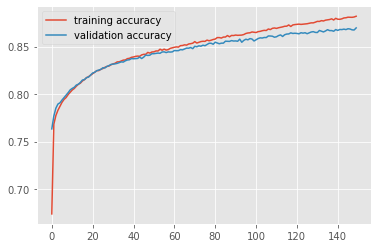

In [85]:
model = Sequential()
model.add(Dense(1024, input_dim=23, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
opt = Adam(lr=0.001, decay = 0.00001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', 'mse'])
model.summary()

history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=2), 
          epochs=150, batch_size=50000, 
          validation_data= (X_test, keras.utils.to_categorical(y_test,num_classes=2)))


plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 1024)              24576     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_99 (Dense)             (None, 2)                 66        
Total params: 295,266
Trainable params: 295,266
Non-trainable params: 0
_______________________________________________

354/354 [==============================] - 1s 2ms/step - loss: 0.2397 - accuracy: 0.8986 - mse: 0.0734 - val_loss: 0.2951 - val_accuracy: 0.8775 - val_mse: 0.0897
Epoch 42/150
354/354 [==============================] - 1s 2ms/step - loss: 0.2400 - accuracy: 0.8992 - mse: 0.0734 - val_loss: 0.2935 - val_accuracy: 0.8790 - val_mse: 0.0888
Epoch 43/150
354/354 [==============================] - 1s 2ms/step - loss: 0.2430 - accuracy: 0.8975 - mse: 0.0743 - val_loss: 0.2905 - val_accuracy: 0.8790 - val_mse: 0.0881
Epoch 44/150
354/354 [==============================] - 1s 2ms/step - loss: 0.2395 - accuracy: 0.8992 - mse: 0.0732 - val_loss: 0.2886 - val_accuracy: 0.8802 - val_mse: 0.0877
Epoch 45/150
354/354 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9025 - mse: 0.0708 - val_loss: 0.2887 - val_accuracy: 0.8796 - val_mse: 0.0877
Epoch 46/150
354/354 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9034 - mse: 0.0702 - val_loss: 0.287

354/354 [==============================] - 1s 2ms/step - loss: 0.1525 - accuracy: 0.9387 - mse: 0.0453 - val_loss: 0.2800 - val_accuracy: 0.8989 - val_mse: 0.0775
Epoch 134/150
354/354 [==============================] - 1s 2ms/step - loss: 0.1516 - accuracy: 0.9382 - mse: 0.0452 - val_loss: 0.2827 - val_accuracy: 0.8987 - val_mse: 0.0781
Epoch 135/150
354/354 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.9393 - mse: 0.0446 - val_loss: 0.2836 - val_accuracy: 0.8980 - val_mse: 0.0785
Epoch 136/150
354/354 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9393 - mse: 0.0445 - val_loss: 0.2806 - val_accuracy: 0.8999 - val_mse: 0.0775
Epoch 137/150
354/354 [==============================] - 1s 2ms/step - loss: 0.1487 - accuracy: 0.9397 - mse: 0.0443 - val_loss: 0.2839 - val_accuracy: 0.8980 - val_mse: 0.0784
Epoch 138/150
354/354 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9397 - mse: 0.0444 - val_loss: 

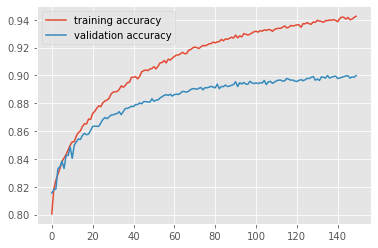

In [89]:
model = Sequential()
model.add(Dense(1024, input_dim=23, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
opt = Adam(lr=0.001, decay = 0.00001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', 'mse'])
model.summary()

history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=2), 
          epochs=150, batch_size=500, 
          validation_data= (X_test, keras.utils.to_categorical(y_test,num_classes=2)))


plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1024)              24576     
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 514       
Total params: 287,490
Trainable params: 287,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
8826/8826 [==============================] - 17s 2ms/step - loss: 0.4221 - accuracy: 0.8043 - mse: 0.1

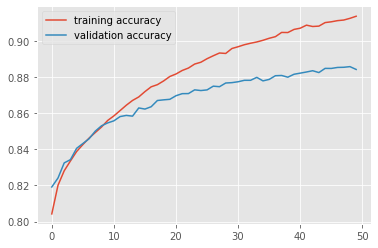

In [27]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(1024, input_dim=23, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
opt = Adam(lr=0.001, decay = 0.00001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', 'mse'])
model.summary()
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20, 
                               verbose = 1, restore_best_weights=True)

history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=2), 
                    callbacks=[early_stopping], epochs=150, batch_size=20, 
                    validation_data= (X_test, keras.utils.to_categorical(y_test,num_classes=2)))


plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [33]:
rain = df1[df1["RainTomorrow"] == 1]
no_rain = df1[df1["RainTomorrow"] == 0].head(df1[df1["RainTomorrow"] == 1].shape[0])

final = pd.concat([rain, no_rain], axis = 0) 

X = final.drop('RainTomorrow', axis = 1)
y = final['RainTomorrow']

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1024)              24576     
_________________________________________________________________
dropout_21 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 514       
Total params: 287,490
Trainable params: 287,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
341/341 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8125 - mse: 0.131

Epoch 42/150
341/341 [==============================] - 1s 2ms/step - loss: 0.1779 - accuracy: 0.9247 - mse: 0.0545 - val_loss: 0.3313 - val_accuracy: 0.8707 - val_mse: 0.0962
Epoch 43/150
341/341 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9251 - mse: 0.0541 - val_loss: 0.3489 - val_accuracy: 0.8702 - val_mse: 0.0969
Epoch 44/150
341/341 [==============================] - 1s 2ms/step - loss: 0.1754 - accuracy: 0.9265 - mse: 0.0534 - val_loss: 0.3365 - val_accuracy: 0.8742 - val_mse: 0.0955
Epoch 45/150
341/341 [==============================] - 1s 2ms/step - loss: 0.1720 - accuracy: 0.9272 - mse: 0.0525 - val_loss: 0.3396 - val_accuracy: 0.8715 - val_mse: 0.0961
Epoch 00045: early stopping


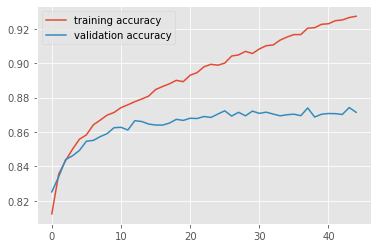

In [34]:
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(1024, input_dim=23, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
opt = Adam(lr=0.001, decay = 0.00001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', 'mse'])
model.summary()
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20, 
                               verbose = 1, restore_best_weights=True)

history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=2), 
                    callbacks=[early_stopping], epochs=150, batch_size=150, 
                    validation_data= (X_test, keras.utils.to_categorical(y_test,num_classes=2)))


plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1024)              24576     
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 514       
Total params: 287,490
Trainable params: 287,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
341/341 [==============================] - 1s 2ms/step - loss: 0.4195 - accuracy: 0.8066 - mse: 0.134

Epoch 42/150
341/341 [==============================] - 1s 2ms/step - loss: 0.2451 - accuracy: 0.8934 - mse: 0.0758 - val_loss: 0.2929 - val_accuracy: 0.8711 - val_mse: 0.0916
Epoch 43/150
341/341 [==============================] - 1s 3ms/step - loss: 0.2441 - accuracy: 0.8942 - mse: 0.0751 - val_loss: 0.2928 - val_accuracy: 0.8726 - val_mse: 0.0910
Epoch 44/150
341/341 [==============================] - 1s 2ms/step - loss: 0.2411 - accuracy: 0.8965 - mse: 0.0743 - val_loss: 0.2929 - val_accuracy: 0.8739 - val_mse: 0.0907
Epoch 45/150
341/341 [==============================] - 1s 2ms/step - loss: 0.2410 - accuracy: 0.8959 - mse: 0.0746 - val_loss: 0.2932 - val_accuracy: 0.8763 - val_mse: 0.0904
Epoch 46/150
341/341 [==============================] - 1s 2ms/step - loss: 0.2400 - accuracy: 0.8968 - mse: 0.0739 - val_loss: 0.2936 - val_accuracy: 0.8747 - val_mse: 0.0914
Epoch 47/150
341/341 [==============================] - 1s 2ms/step - loss: 0.2371 - accuracy: 0.8987 - mse: 0.0733 - va

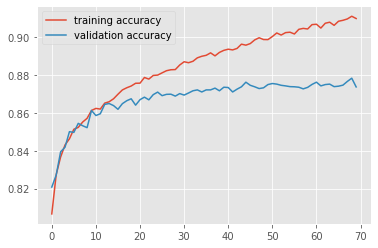

In [35]:
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(1024, input_dim=23, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
opt = Adam(lr=0.001, decay = 0.00001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', 'mse'])
model.summary()
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20, 
                               verbose = 1, restore_best_weights=True)

history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=2), 
                    callbacks=[early_stopping], epochs=150, batch_size=150, 
                    validation_data= (X_test, keras.utils.to_categorical(y_test,num_classes=2)))


plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1024)              24576     
_________________________________________________________________
dropout_37 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 514       
Total params: 287,490
Trainable params: 287,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
1021/1021 [=========

Epoch 00071: early stopping


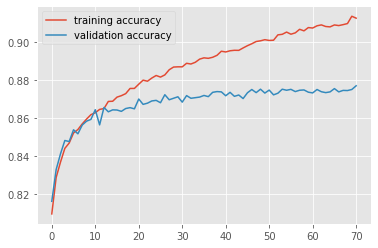

In [42]:
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(1024, input_dim=23, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
opt = Adam(lr=0.001, decay = 0.00001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', 'mse', 'AUC'])
model.summary()
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20, 
                               verbose = 1, restore_best_weights=True)

history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=2), 
                    callbacks=[early_stopping], epochs=150, batch_size=50, 
                    validation_data= (X_test, keras.utils.to_categorical(y_test,num_classes=2)))


plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [12]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,396,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0,12
1,397,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0,12
2,398,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0,12
3,399,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0,12
4,400,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,12


In [13]:
# Replacing Nans with mode values and medians in case of integers.
for i in list(df):
    print(i)
    print(df[df[i].isna()].shape[0])


Date
0
Location
0
MinTemp
1485
MaxTemp
1261
Rainfall
3261
Evaporation
62790
Sunshine
69835
WindGustDir
10326
WindGustSpeed
10263
WindDir9am
10566
WindDir3pm
4228
WindSpeed9am
1767
WindSpeed3pm
3062
Humidity9am
2654
Humidity3pm
4507
Pressure9am
15065
Pressure3pm
15028
Cloud9am
55888
Cloud3pm
59358
Temp9am
1767
Temp3pm
3609
RainToday
3261
RainTomorrow
3267


In [16]:
10263/145460

0.07055547916953114

In [17]:
X = df1.drop(columns = ['RainTomorrow', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)
y = df1['RainTomorrow']

# Trying the oversampling method:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

0.7729508010968341
0.8777165907494278
0.7201033380923244
0.8319849525233983
0.7704579962381308
0.7911029528406645
0.7720216647404083


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.877717
6,Decision Tree,0.831985
2,Random Forest Classifier,0.791103
3,Logistic Regression,0.772951
1,Linear SVC,0.772022
5,Stochastic Gradient Decent,0.770458
4,Naive Bayes,0.720103


In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8777165907494278
Precision Score : 0.8773542398846536
Recall Score : 0.8792558475571209
F1 Score : 0.8783040144339197


In [20]:
rain = df1[df1["RainTomorrow"] == 1]
no_rain = df1[df1["RainTomorrow"] == 0].head(df1[df1["RainTomorrow"] == 1].shape[0])

final = pd.concat([rain, no_rain], axis = 0) 

X = final.drop(columns = ['RainTomorrow', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)
y = final['RainTomorrow']

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

0.7721747313936161
0.7818994588659713
0.7445690534075758
0.8119363187201004
0.7660575641126186
0.7706846521841424
0.7699788251901811


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Decision Tree,0.811936
0,KNN,0.781899
3,Logistic Regression,0.772175
2,Random Forest Classifier,0.770685
1,Linear SVC,0.769979
5,Stochastic Gradient Decent,0.766058
4,Naive Bayes,0.744569


In [22]:
X = df1.drop(columns = ['RainTomorrow', 'Evaporation', 'Sunshine', 'Cloud9am', 
                        'Cloud3pm', "WindDir3pm", "Date", "Location"], axis = 1)
y = df1['RainTomorrow']

# Trying the oversampling method:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

0.7718856935662973
0.8853309764996488
0.7198313957441023
0.8332993405398056
0.7723842545380379
0.8038615813447549
0.7710925283839826


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model,Score
0,KNN,0.885331
6,Decision Tree,0.833299
2,Random Forest Classifier,0.803862
5,Stochastic Gradient Decent,0.772384
3,Logistic Regression,0.771886
1,Linear SVC,0.771093
4,Naive Bayes,0.719831


In [23]:
rain = df1[df1["RainTomorrow"] == 1]
no_rain = df1[df1["RainTomorrow"] == 0].head(df1[df1["RainTomorrow"] == 1].shape[0])

final = pd.concat([rain, no_rain], axis = 0) 

X = df1.drop(columns = ['RainTomorrow', 'Evaporation', 'Sunshine', 'Cloud9am', 
                        'Cloud3pm', "WindDir3pm", "Date", "Location"], axis = 1)
y = df1['RainTomorrow']

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

0.8396919722915714
0.8181370652976546
0.8091353423116143
0.7799149055873976
0.8355427406026935
0.8178909244347551
0.8395513203699145


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model,Score
3,Logistic Regression,0.839692
1,Linear SVC,0.839551
5,Stochastic Gradient Decent,0.835543
0,KNN,0.818137
2,Random Forest Classifier,0.817891
4,Naive Bayes,0.809135
6,Decision Tree,0.779915


In [54]:
from sklearn.model_selection import KFold

X = df1.drop(columns = ['RainTomorrow', 'Evaporation', 'Sunshine', 'Cloud9am', 
                        'Cloud3pm', "WindDir3pm", "Date", "Location"], axis = 1)
y = df1['RainTomorrow']

# Trying the oversampling method:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)
kf = KFold(n_splits=44, random_state=44, shuffle =True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)
    

0.7776226565616274
0.9182289589150379
0.7311527722377343
0.8438372556840845
0.7145991224571201
0.8161148783406462
0.706222576785002


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model,Score
0,KNN,0.918229
6,Decision Tree,0.843837
2,Random Forest Classifier,0.816115
3,Logistic Regression,0.777623
4,Naive Bayes,0.731153
5,Stochastic Gradient Decent,0.714599
1,Linear SVC,0.706223


In [62]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


Accuracy Score : 0.9176306342241723
Precision Score : 0.8817518248175182
Recall Score : 0.9644710578842315
F1 Score : 0.921258341277407


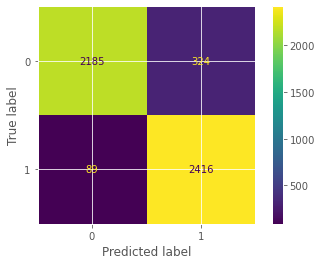

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test) 

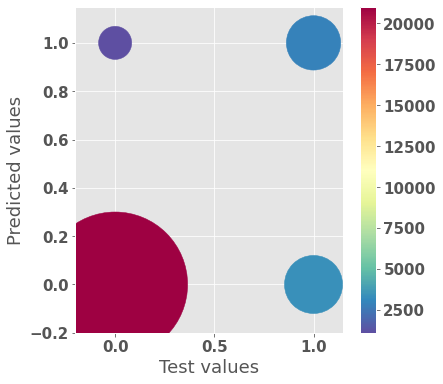

In [24]:
points=list(set(zip(y_test.tolist(),y_pred))) 
count=[len([x for x,y in zip(y_test.tolist(),y_pred) if x==p[0] and y==p[1]]) for p in points]
plot_x=[i[0] for i in points]
plot_y=[i[1] for i in points]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

count=np.array(count)
plt.figure(figsize=(6,6))
plt.scatter(plot_x,plot_y,c=count,s=count,cmap='Spectral_r')
plt.xlabel("Test values")
plt.ylabel("Predicted values")
plt.xlim(-.2, 1.15)
plt.ylim(-.2, 1.15)
plt.colorbar()
plt.show()


In [38]:
df["year"] = df["Date"].str.split("-", expand = True)[0]

In [43]:
df.groupby(by= "year")["Rainfall"].mean()

year
2007    3.219672
2008    2.293541
2009    2.166385
2010    2.710924
2011    2.829197
2012    2.416200
2013    2.272402
2014    1.966341
2015    2.160753
2016    2.384054
2017    2.478834
Name: Rainfall, dtype: float64

In [47]:
cities_rainfall = df.groupby(by= "Location")["Rainfall"].mean().sort_values(ascending = False)

In [48]:
cities_temp = df.groupby(by= "Location")["MaxTemp"].mean().sort_values(ascending = False)
cities_temp_df = pd.DataFrame(cities_temp)
merge2 = merge.merge(cities_temp_df, right_on = "Location", left_on = "city")
merge2.head()
temperature = merge2['MaxTemp'].values

In [49]:
merge2.head()

,Rainfall,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,MaxTemp
0,5.742035,Cairns,Cairns,-16.9303,145.7703,Australia,AU,AUS,Queensland,NaN,152729.0,1036016939,29.558849
1,5.092452,Darwin,Darwin,-12.4381,130.8411,Australia,AU,AUS,Northern Territory,admin,136828.0,1036497565,32.540977
2,3.594903,Wollongong,Wollongong,-34.4331,150.8831,Australia,AU,AUS,New South Wales,NaN,302739.0,1036502269,21.468174
3,3.485592,Townsville,Townsville,-19.2564,146.8183,Australia,AU,AUS,Queensland,NaN,180820.0,1036500020,29.367160
4,3.324543,Sydney,Sydney,-33.8650,151.2094,Australia,AU,AUS,New South Wales,admin,5312163.0,1036074917,23.001975


In [34]:
cities_rainfall_df = pd.DataFrame(cities_rainfall)

In [35]:
# cities_rainfall_df.reset_index(inplace = True)
cities_rainfall_df.head()

,Rainfall
Location,
Cairns,5.742035
Darwin,5.092452
CoffsHarbour,5.061497
GoldCoast,3.769396
Wollongong,3.594903


In [36]:
cit = pd.read_csv("worldcities.csv")
merge = cities_rainfall_df.merge(cit, left_on = "Location", right_on = "city")
city = merge2["city"]

In [37]:
merge.head()

,Rainfall,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,5.742035,Cairns,Cairns,-16.9303,145.7703,Australia,AU,AUS,Queensland,NaN,152729.0,1036016939
1,5.092452,Darwin,Darwin,-12.4381,130.8411,Australia,AU,AUS,Northern Territory,admin,136828.0,1036497565
2,3.594903,Wollongong,Wollongong,-34.4331,150.8831,Australia,AU,AUS,New South Wales,NaN,302739.0,1036502269
3,3.485592,Townsville,Townsville,-19.2564,146.8183,Australia,AU,AUS,Queensland,NaN,180820.0,1036500020
4,3.324543,Sydney,Sydney,-33.8650,151.2094,Australia,AU,AUS,New South Wales,admin,5312163.0,1036074917


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


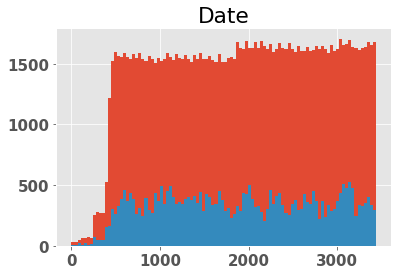

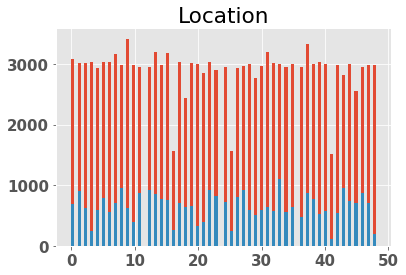

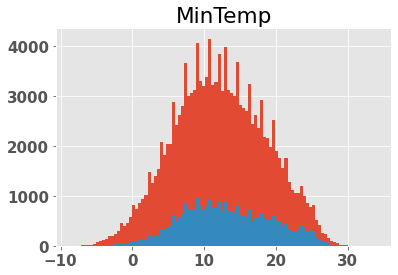

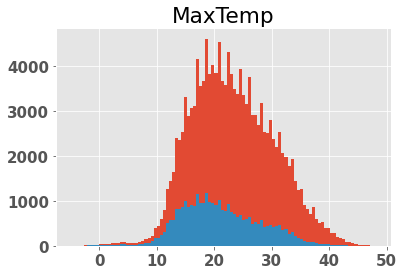

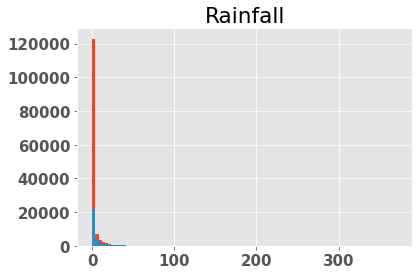

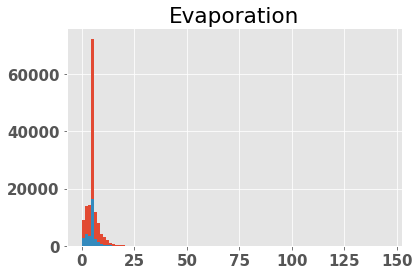

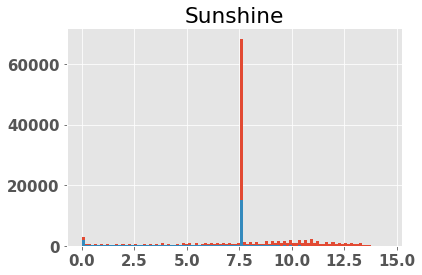

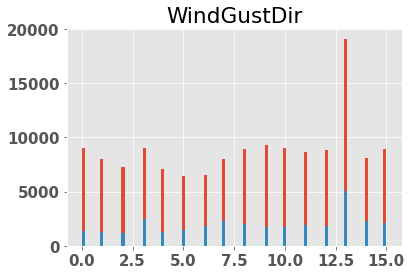

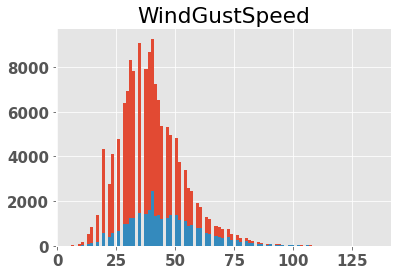

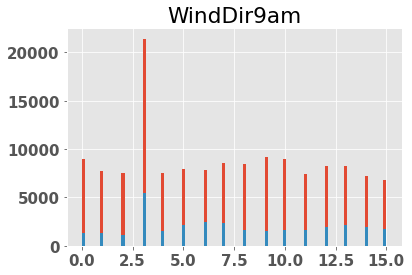

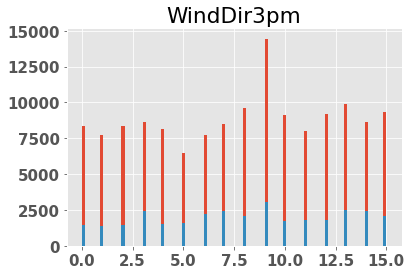

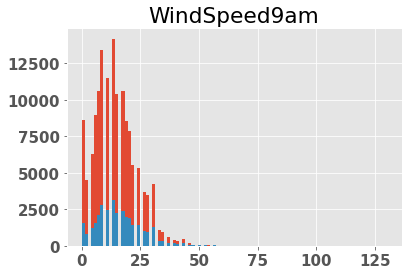

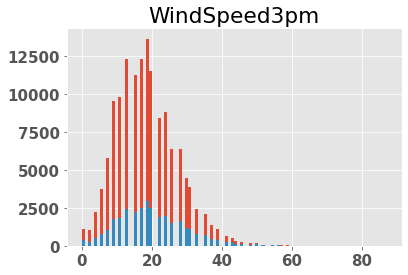

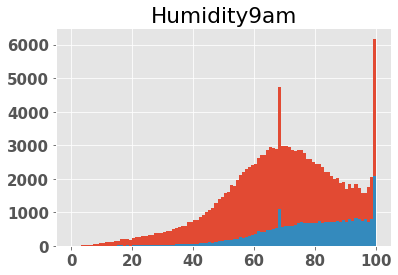

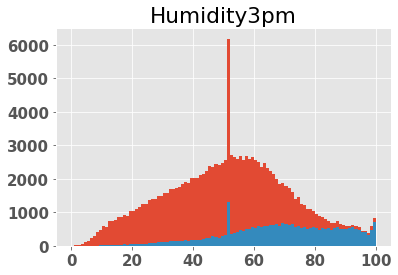

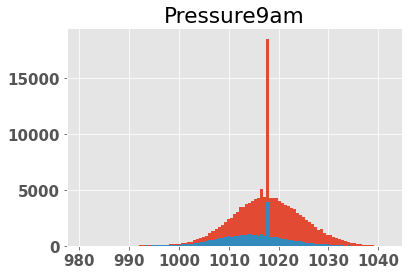

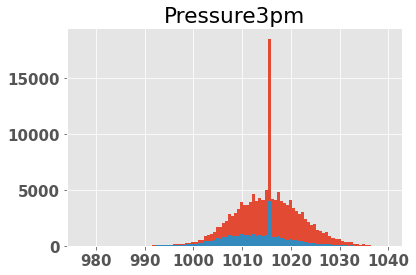

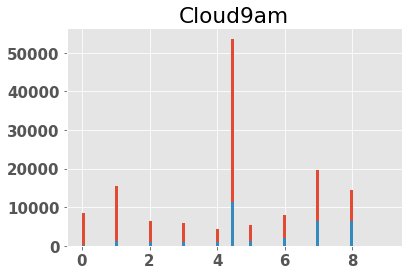

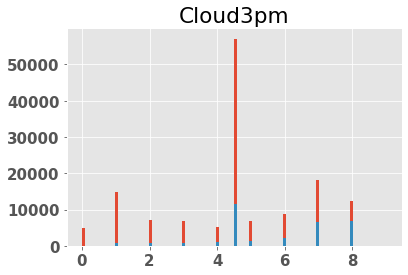

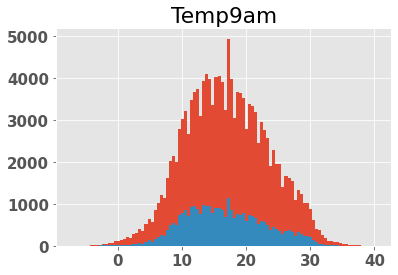

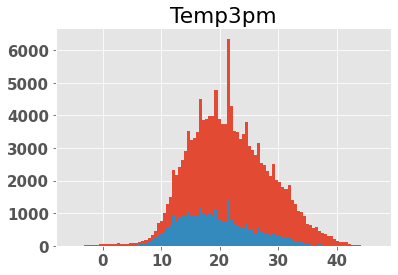

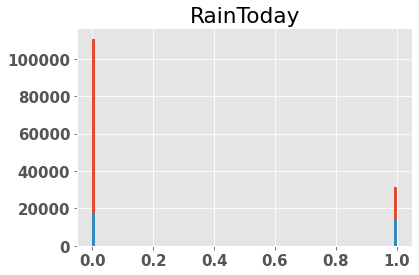

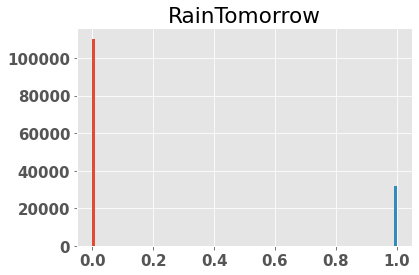

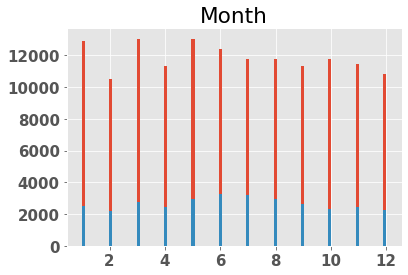

In [38]:
for i in list(df1):
    plt.figure()
    plt.title(i)
    binwidth = (-min(df1[i]) + max(df1[i]))/100
    bins = np.arange(min(df1[i]), max(df1[i]) + binwidth, binwidth)
    plt.hist(df1[i], bins = bins);
    plt.hist(df1[i][df1["RainTomorrow"] == 1], bins = bins);

In [39]:
import os
os.environ["PROJ_LIB"] = "/home/amandlik/.conda/envs/ABC_II/share"
from mpl_toolkits.basemap import Basemap

In [50]:
# Extract the data we're interested in
lat = merge['lat'].values
lon = merge['lng'].values
rainfall = merge['Rainfall'].values
city = merge['city'].values
# temperature = merge['area_total_km2'].values

In [54]:
print(city.values)
# print(lon)


['Cairns' 'Darwin' 'Wollongong' 'Townsville' 'Sydney' 'Katherine'
 'Newcastle' 'Newcastle' 'Newcastle' 'Newcastle' 'Brisbane' 'Walpole'
 'Portland' 'Portland' 'Portland' 'Portland' 'Portland' 'Portland'
 'Portland' 'Portland' 'Albany' 'Albany' 'Albany' 'Albany' 'Albany'
 'Penrith' 'Penrith' 'Richmond' 'Richmond' 'Richmond' 'Richmond'
 'Richmond' 'Richmond' 'Richmond' 'Richmond' 'Richmond' 'Richmond'
 'Richmond' 'Richmond' 'Richmond' 'Richmond' 'Launceston' 'Launceston'
 'Albury' 'Perth' 'Perth' 'Perth' 'Melbourne' 'Melbourne' 'Canberra'
 'Ballarat' 'Moree' 'Bendigo' 'Hobart' 'Hobart' 'Hobart' 'Hobart'
 'Adelaide' 'Sale' 'Sale' 'Sale' 'Nuriootpa' 'Mildura' 'Woomera']


In [52]:
merge2.head()

,Rainfall,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,MaxTemp
0,5.742035,Cairns,Cairns,-16.9303,145.7703,Australia,AU,AUS,Queensland,NaN,152729.0,1036016939,29.558849
1,5.092452,Darwin,Darwin,-12.4381,130.8411,Australia,AU,AUS,Northern Territory,admin,136828.0,1036497565,32.540977
2,3.594903,Wollongong,Wollongong,-34.4331,150.8831,Australia,AU,AUS,New South Wales,NaN,302739.0,1036502269,21.468174
3,3.485592,Townsville,Townsville,-19.2564,146.8183,Australia,AU,AUS,Queensland,NaN,180820.0,1036500020,29.367160
4,3.324543,Sydney,Sydney,-33.8650,151.2094,Australia,AU,AUS,New South Wales,admin,5312163.0,1036074917,23.001975
